<h1 style="text-align: center;">
    Marketing Analytics: Customer Segmentation
</h1>  

## 1. Giới thiệu về challenge

### Bối Cảnh
Việc phân tích hiệu quả quảng cáo (***ad performance***) và tối ưu ngân sách marketing là yếu tố then chốt giúp doanh nghiệp tăng trưởng bền vững.  
Dựa trên bộ dữ liệu thực tế từ nhiều chiến dịch quảng cáo đa kênh, đa mục tiêu, đa phân khúc khách hàng và nhiều địa phương/ngôn ngữ khác nhau, bạn sẽ khám phá các yếu tố tạo nên ROI cao, nhắm đúng đối tượng và cải thiện conversion rate.  

### Mô Tả Dữ Liệu

#### Tổng Quan
- Bộ dữ liệu bao gồm thông tin chi tiết về **2.206 khách hàng** của công ty XYZ, tập trung vào hồ sơ khách hàng, mức độ tiêu dùng sản phẩm, hành vi phản hồi với các chiến dịch marketing và hiệu quả của các kênh bán hàng.  
- Bộ dữ liệu này lý tưởng cho việc phân tích hành vi khách hàng, đo lường mức độ thành công của các chiến dịch quảng cáo, xây dựng mô hình dự đoán phản hồi khách hàng và đề xuất chiến lược marketing cá nhân hóa.

#### Cấu Trúc Dữ Liệu
Bộ dữ liệu bao gồm nhiều cột, mỗi cột phản ánh một khía cạnh quan trọng về khách hàng hoặc hoạt động marketing:

| **Cột**              | **Mô tả**                                                                 |
|:---------------------|---------------------------------------------------------------------------|
| AcceptedCmp1–5       | Khách hàng có chấp nhận ưu đãi trong 5 chiến dịch đầu tiên (1: Có, 0: Không) |
| AcceptedCmpOverall   | Tổng số chiến dịch đã được khách hàng chấp nhận                           |
| Response             | Khách hàng có chấp nhận ưu đãi trong chiến dịch gần nhất hay không         |
| Complain             | Khách hàng có khiếu nại trong 2 năm gần nhất (1: Có, 0: Không)             |
| Customer_Days        | Số ngày kể từ khi khách hàng đăng ký                                      |
| Education_*          | Trình độ học vấn của khách hàng (2n Cycle, Basic, Graduation, Master, PhD) |
| Marital_*            | Tình trạng hôn nhân (Divorced, Married, Single, Together, Widow)           |
| Kidhome              | Số trẻ nhỏ trong hộ gia đình khách hàng                                    |
| Teenhome             | Số thanh thiếu niên trong hộ gia đình khách hàng                           |
| Income               | Thu nhập hằng năm của hộ gia đình                                          |
| MntFishProducts      | Chi tiêu cho sản phẩm cá trong 2 năm gần nhất                              |
| MntMeatProducts      | Chi tiêu cho sản phẩm thịt trong 2 năm gần nhất                            |
| MntFruits            | Chi tiêu cho sản phẩm trái cây trong 2 năm gần nhất                        |
| MntSweetProducts     | Chi tiêu cho sản phẩm bánh kẹo trong 2 năm gần nhất                        |
| MntWines             | Chi tiêu cho sản phẩm rượu vang trong 2 năm gần nhất                       |
| MntGoldProds         | Chi tiêu cho sản phẩm vàng trong 2 năm gần nhất                            |
| NumDealsPurchases    | Số lần mua hàng với khuyến mãi                                             |
| NumCatalogPurchases  | Số lần mua hàng qua catalog                                                |
| NumStorePurchases    | Số lần mua hàng trực tiếp tại cửa hàng                                     |
| NumWebPurchases      | Số lần mua hàng qua website công ty                                        |
| NumWebVisitsMonth    | Số lần khách hàng ghé website trong tháng gần nhất                         |
| Recency              | Số ngày kể từ lần mua hàng gần nhất                                        |
| Age                  | Tuổi của khách hàng                                                        |
| MntTotal             | Tổng chi tiêu cho tất cả sản phẩm                                          |
| MntRegularProds      | Tổng chi tiêu cho các sản phẩm thông thường                                |


## 2. Tiền xử lý dữ liệu

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
filepath = "../dataset/ifood_df.csv"
data = pd.read_csv(filepath)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


### Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 2205 dòng và 39 cột


### Dữ liệu có bị thiếu không? Nếu có thì in ra tên cột và số lượng thiếu tương ứng.

In [4]:
null_counts = data.isnull().sum()

if (null_counts == 0).all():
    print("Dữ liệu không bị thiếu.")
else:
    print("Dữ liệu bị thiếu ở các cột sau:")
    print(null_counts[null_counts > 0])

Dữ liệu không bị thiếu.


### Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [5]:
# Tự động tối ưu kiểu dữ liệu
# data = data.convert_dtypes()
# Xuất kiểu dữ liệu sau khi tối ưu
def df_types(data):
    return pd.DataFrame({ "Data Type": data.dtypes.astype(str) })
df_types(data)

,Data Type
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


#### Xử Lý Dữ Liệu Category  

Các cột category đều đã được **chuyển thành dạng one-hot encoding**. Điều này thuận tiện khi áp dụng các thuật toán Machine Learning, nhưng lại khiến số lượng cột tăng lên đáng kể, gây khó khăn cho các phân tích cơ bản.  

Do đó, tôi sẽ tiến hành **gộp lại các cột liên quan thành nhóm** để thuận tiện cho việc quan sát và trực quan hóa:  

- **Trình độ học vấn (`Education`)**:  
  Gộp từ các cột one-hot `education_2n Cycle`, `education_Basic`, `education_Graduation`, `education_Master`, `education_PhD`.  

- **Tình trạng hôn nhân (`Marital`)**:  
  Gộp từ các cột one-hot `marital_Divorced`, `marital_Married`, `marital_Single`, `marital_Together`, `marital_Widow`.  

- **Chiến dịch quảng cáo đã chấp nhận (`AcceptedCmp`)**:  
  Tạo cột tổng hợp `AcceptedCmpTotal` bằng cách cộng các cột `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`.  

- **Tổng chi tiêu (`MntTotal`)**:  
  Gộp các khoản chi tiêu sản phẩm: `MntFishProducts`, `MntMeatProducts`, `MntFruits`, `MntSweetProducts`, `MntW

In [6]:
# Copy dữ liệu gốc để xử lý
pre_data = data.copy()

# Gộp Education
pre_data["Education"] = (
    pre_data[["education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"]]
    .idxmax(axis=1)
    .str.replace("education_", "")
)

# Gộp Marital
pre_data["Marital"] = (
    pre_data[["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]]
    .idxmax(axis=1)
    .str.replace("marital_", "")
)

# Drop các cột gốc đã gộp
pre_data = pre_data.drop(
    columns=[
        "education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD",
        "marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"
    ]
)

pre_data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,Marital
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,Graduation,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,Graduation,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,Graduation,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,Graduation,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,PhD,Married


In [7]:
# Chuyển toàn bộ cột object sang string dtype
obj_cols = pre_data.select_dtypes(include='object').columns
pre_data[obj_cols] = pre_data[obj_cols].astype('string')

In [8]:
print("Dữ liệu sau chuyển đổi")
df_types(pre_data)

Dữ liệu sau chuyển đổi


,Data Type
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


### Dữ liệu có trùng lặp không

In [9]:
if pre_data.duplicated().any():
    print("Dữ liệu có trùng lặp")
else:
    print("Dữ liệu không có trùng lặp")

Dữ liệu có trùng lặp


In [10]:
pre_data = pre_data.drop_duplicates()

### Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

#### Đối với cột dữ liệu dạng số

In [11]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [12]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in pre_data._get_numeric_data():
    num_col_info_df[i] = col_info(i, pre_data)
num_col_info_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
min,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,24.0,2159.0,4.0,-283.0,0.0
lower_quartile,35416.0,0.0,0.0,24.0,24.0,2.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2337.0,55.0,42.0,0.0
median,51412.0,0.0,0.0,49.0,178.0,8.0,68.0,12.0,8.0,25.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,50.0,2511.0,343.0,288.0,0.0
upper_quartile,68274.0,1.0,1.0,74.0,507.0,33.0,230.0,50.0,34.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,61.0,2688.0,964.0,883.0,0.0
max,113734.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,262.0,321.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0,80.0,2858.0,2491.0,2458.0,4.0


Ở đây có 2 cột chỉ có 1 giá trị duy nhất là `Z_CostContact` và `Z_Revenue`, đồng thời cũng không có giải thích ý nghĩa của cột. Ta sẽ thực hiện drop luôn 2 cột này.

In [13]:
# Drop các cột vô nghĩa
pre_data = pre_data.drop(columns=["Z_CostContact", "Z_Revenue"])
data = data.drop(columns=["Z_CostContact", "Z_Revenue"])

Ta vẽ biểu đồ `Boxplot` và `Violinplot` để thể hiện sự phân bố dữ liệu với các cột dạng số. Ở đây sẽ có loại trừ các cột chỉ có giá trị 0, 1 đại diện cho True, False.

In [14]:
# Chọn các cột số
numeric_cols = [
    col for col in num_col_info_df.columns
    if num_col_info_df.loc['max', col] != 1 and col not in ["Z_CostContact", "Z_Revenue"]
]

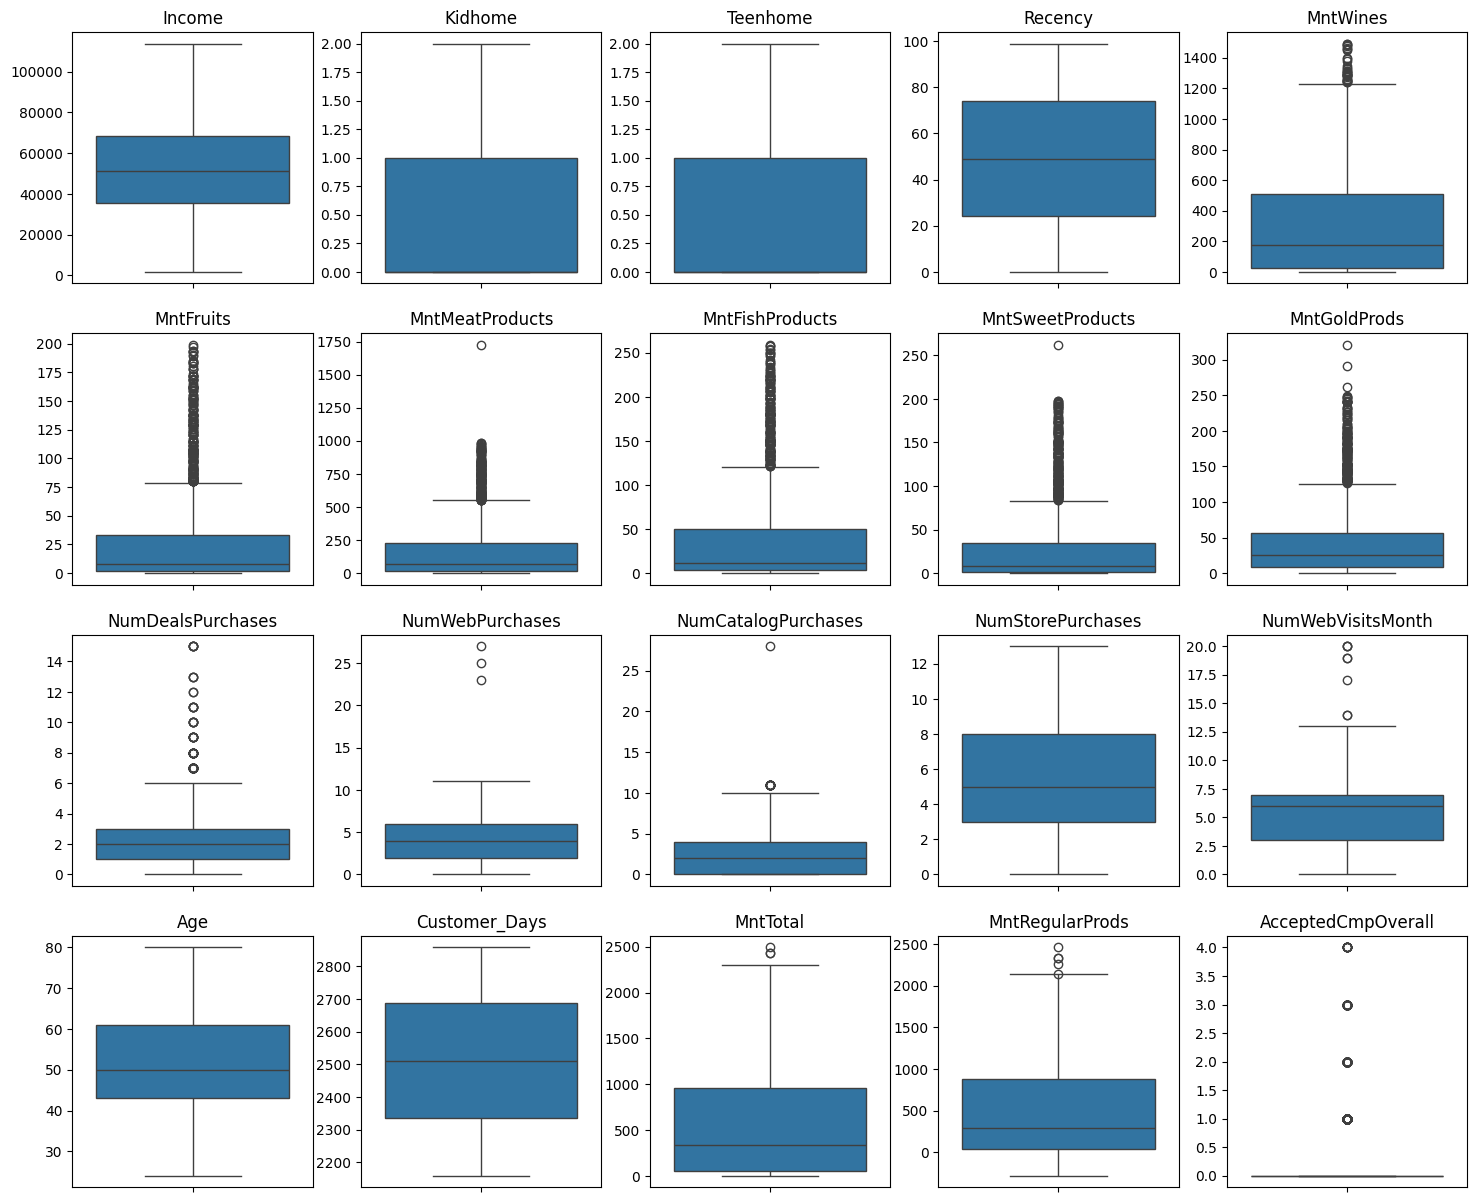

In [15]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data = pre_data, y = pre_data[col], ax = axs[i])
    axs[i].set_ylabel("")
    axs[i].set_title(col)
plt.show()

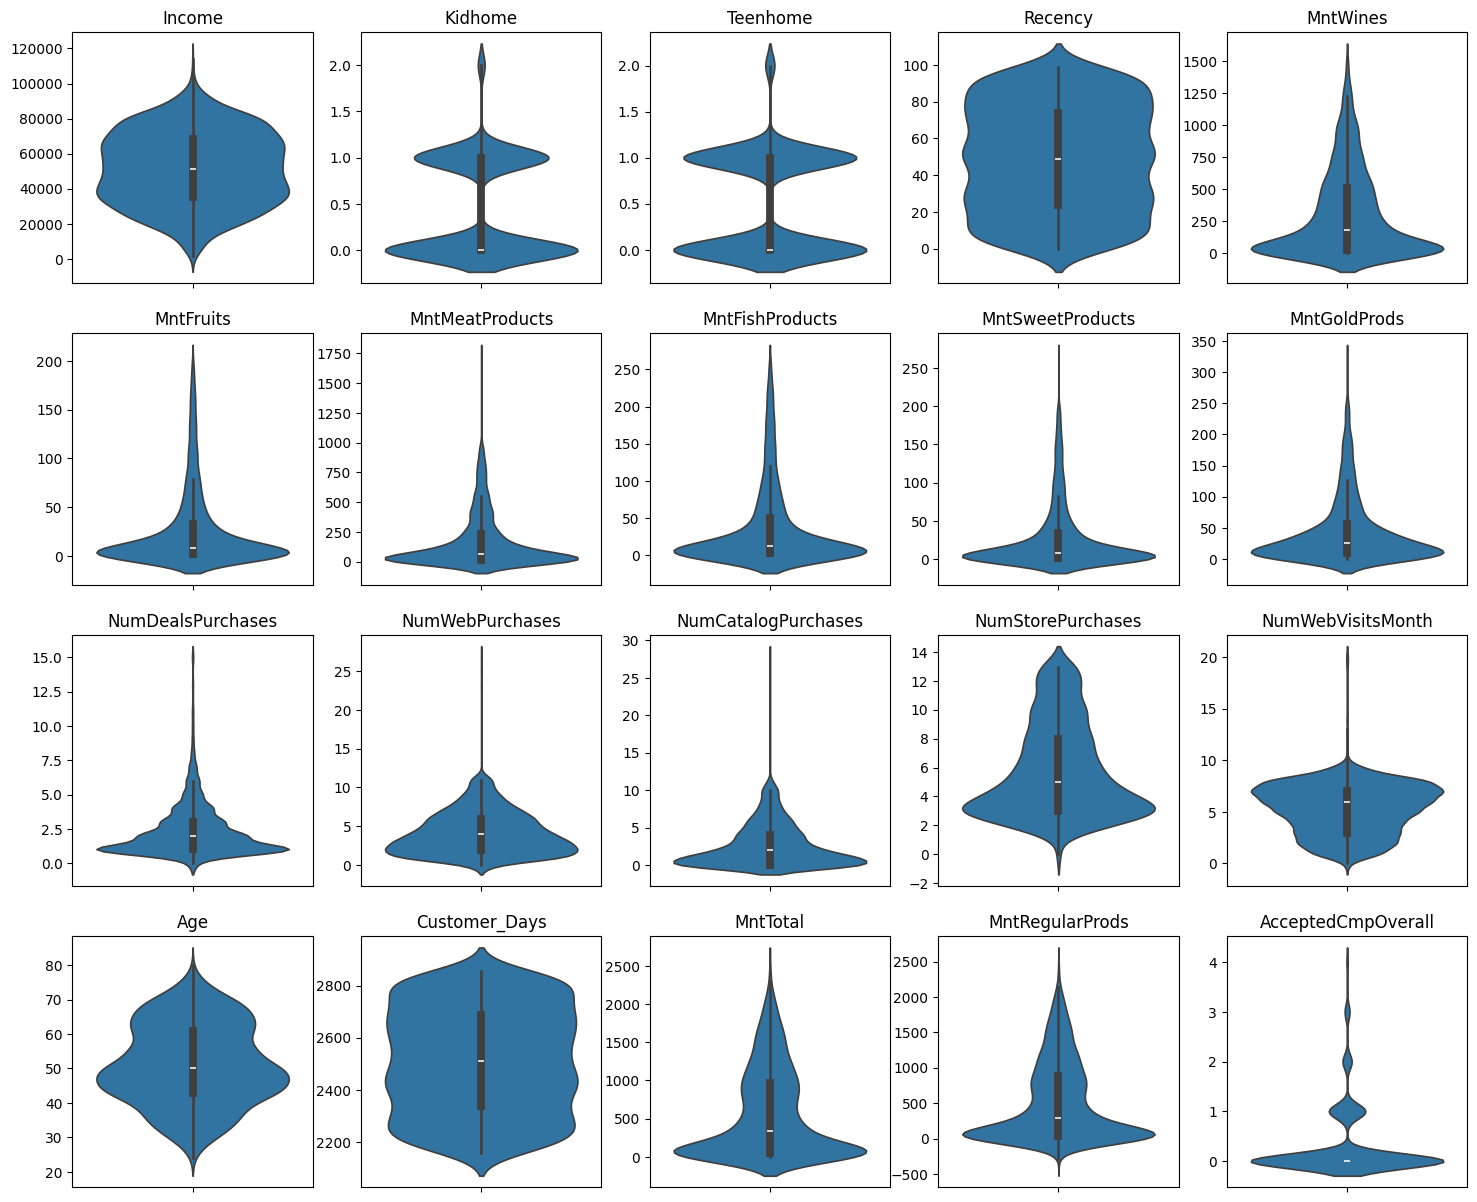

In [16]:
fig, axs = plt.subplots(4, 5, figsize=(18, 15))
axs = axs.flatten()
for i, col in enumerate(numeric_cols):
    sns.violinplot(y = col, data = pre_data, ax=axs[i], orient='h')
    axs[i].set_ylabel("")
    axs[i].set_title(col)
plt.show()

In [17]:
print(pre_data['Age'].min(), pre_data['Age'].max())

24 80


**Nhận xét chi tiết:**

- **Đặc điểm nhân khẩu học (`Age`, `Customer_Days`, `Income`):**  
   - **`Age`**: trải dài từ 24 đến khoảng 80 tuổi, trong đó có thể chia thành hai nhóm chính:
        - **Nhóm 22 – 50 tuổi:** Đây là lực lượng khách hàng trẻ và trung niên, thường có thu nhập ổn định, nhu cầu đa dạng và xu hướng mua sắm để đáp ứng nhu cầu thiết thực trong cuộc sống.
        - **Nhóm trên 50 tuổi:** Đây là nhóm khách hàng lớn tuổi, có kinh nghiệm, thường cân nhắc kỹ lưỡng, thận trọng hơn trong quyết định mua hàng và chú trọng nhiều đến chất lượng, uy tín thương hiệu.
   - **`Customer_Days`**: Tập trung chủ yếu trong khoảng **6–8 năm**, tức bộ dữ liệu phản ánh nhóm khách hàng đã gắn bó lâu dài với công ty, thiếu sự hiện diện của khách hàng mới hoặc vừa gia nhập.  
   - **`Income`**: Phân bố trải dài nhưng tập trung nhiều ở nhóm **thu nhập trung bình – thấp** hơn là nhóm cao. Điều này gợi ý các chiến lược marketing cần ưu tiên phù hợp với khách hàng có khả năng chi tiêu ở mức vừa phải.
     
- **Hành vi chi tiêu (`Mnt_*`):**  
   - Các biến `MntWines`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntFruits`, `MntGoldProds` đều phân phối lệch phải. Phần lớn khách hàng chi tiêu ở mức rất thấp, chỉ có một nhóm nhỏ chi tiêu cao.  
   - Điều này cho thấy tồn tại **nhóm khách hàng VIP** (heavy spenders) đóng góp phần lớn doanh thu. Đây là nhóm cần được phân tích sâu và ưu tiên trong các chương trình chăm sóc, giữ chân.
   - Các **giá trị chi tiêu cao** không phải là lỗi nhập liệu hay bất thường, mà phản ánh **một nhóm khách hàng thực sự tồn tại** – những người có mức chi tiêu vượt trội (heavy spenders). Đây là **nhóm nhỏ** nhưng thường mang lại **phần lớn doanh thu** cho doanh nghiệp. Nếu loại bỏ, ta sẽ làm mất đi tín hiệu quan trọng về hành vi và giá trị của nhóm khách hàng này. Trong bối cảnh marketing và phân tích khách hàng, các giá trị "cao bất thường" chính là thông tin cần thiết để nhận diện **khách hàng VIP** và thiết kế chiến lược cá nhân hóa. Do đó, thay vì loại bỏ, cần giữ lại các dữ liệu này và sử dụng các kỹ thuật phù hợp (ví dụ: chuẩn hóa dữ liệu, log-transform) để hạn chế ảnh hưởng tiêu cực khi xây dựng mô hình.  

- **Tần suất mua hàng (`Num*Purchases`, `NumWebVisitsMonth`, `Recency`):**  
   - Các biến như `NumWebPurchases`, `NumStorePurchases`, `NumCatalogPurchases` nghiêng về phía tần suất thấp. Nghĩa là đa số khách hàng mua sắm ít, chỉ một số ít thường xuyên mua hàng.  
   - `Recency` trải dài, có cả khách hàng mua gần đây lẫn khách hàng đã lâu không quay lại. Đây là cơ sở quan trọng để xác định **khách hàng có nguy cơ rời bỏ (churn risk)** và triển khai các chiến dịch kích hoạt lại.

- **Ý nghĩa kinh doanh:**  
   - Phân phối dữ liệu thể hiện đặc điểm quen thuộc trong marketing: số đông khách hàng mang lại ít doanh thu, số ít khách hàng mang lại nhiều doanh thu.  
   - Doanh nghiệp cần vừa có chiến lược duy trì nhóm khách hàng trung bình (khuyến mãi, giảm giá), vừa có chiến lược đặc biệt cho nhóm chi tiêu cao (ưu đãi VIP, dịch vụ cá nhân hóa).  
   - Kiểu phân phối này phù hợp để triển khai **clustering** (phân cụm khách hàng) hoặc **RFM analysis** nhằm khai thác sâu hơn hành vi và giá trị khách hàng.

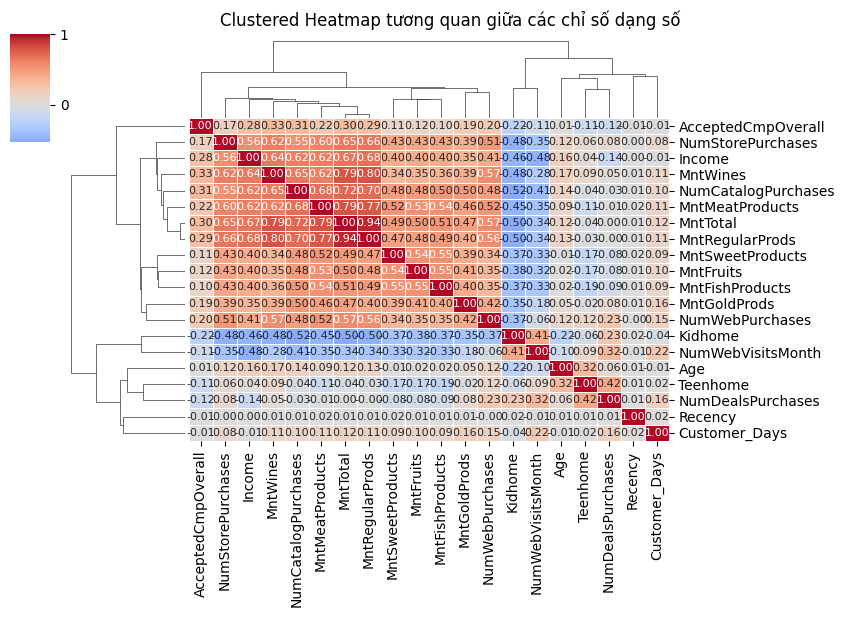

In [18]:
# Tính ma trận tương quan (sử dụng Kendall cho phù hợp với dữ liệu có thể chứa biến nhị phân)
corr = pre_data[numeric_cols].corr(method="kendall")

# Vẽ clustered heatmap với kích thước nhỏ gọn hơn
g = sns.clustermap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_pos=(-0.05, 0.8, 0.05, 0.18),
    figsize=(8, 6),               # giảm kích thước
    annot_kws={"size": 8}         # chữ nhỏ hơn
)

g.fig.suptitle("Clustered Heatmap tương quan giữa các chỉ số dạng số", fontsize=12, y=1.02)
plt.show()


**Nhận xét:**
- Các cột liên quan đến hành vi khách hàng và chi tiêu giữa các loại sản phẩm như `MntWines`, `MntMeatProducts`, `MntFruits`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` có tương quan cao với nhau. Điều này cho thấy khách hàng có xu hướng chi tiêu đồng thời ở nhiều loại sản phẩm thay vì chỉ tập trung vào một nhóm duy nhất.  
- Nhóm có con cháu `Teenhome` hoặc `Kidhome` và nhóm khách hàng lâu năm `Customer_Days` có tương quan cao với `NumDealsPurchases` và `NumWebVisitsMonth`. Đây có thể phản ánh việc các hộ gia đình có con hoặc gắn bó lâu năm thường tận dụng nhiều chương trình khuyến mãi và truy cập web thường xuyên hơn.  
- `NumDealsPurchases` và `NumWebVisitsMonth` có tương quan với `MntTotal` thấp hơn so với các kênh mua hàng trực tiếp như `NumCatalogPurchases`, `NumStorePurchases` và `NumWebPurchases`. Điều này cho thấy việc khách hàng tận dụng khuyến mãi hoặc thường xuyên ghé thăm website chưa chắc dẫn đến tổng chi tiêu cao, trong khi các kênh mua trực tiếp lại đóng góp nhiều hơn cho doanh thu.  
- Đáng chú ý, nhóm khách hàng có `Kidhome` và biến `NumWebVisitsMonth` thậm chí còn có **tương quan âm** với chi tiêu (`MntTotal`). Điều này gợi ý rằng các hộ gia đình có con nhỏ hoặc thường xuyên truy cập website có xu hướng chi tiêu ít hơn, có thể do hạn chế về ngân sách hoặc thói quen tìm hiểu sản phẩm nhiều nhưng ít chuyển đổi thành giao dịch.  

**Hướng phân tích sâu hơn:**
- Kiểm tra xem nhóm khách hàng chi tiêu cao (`MntTotal`) có phải cũng là nhóm có tần suất mua (`Num*Purchases`) và tương tác online cao (`NumWebVisitsMonth`) hay không → hỗ trợ phân loại khách hàng tiềm năng.  
- So sánh hành vi của nhóm có con (`Kidhome`, `Teenhome`) với nhóm không có con để tìm ra sự khác biệt trong tiêu dùng và mức độ nhạy cảm với khuyến mãi.  
- Phân tích riêng từng nhóm chi tiêu (ví dụ: cao, trung bình, thấp) để xem nhóm nào đóng góp chính vào doanh thu và liệu có outlier đặc biệt quan trọng không.  
- Kết hợp thông tin nhân khẩu học (`Education`, `Marital`, `Age`, `Income`) với hành vi chi tiêu để xây dựng chân dung khách hàng rõ ràng hơn cho mục đích marketing.  


#### Đối với các cột kiểu categorical

In [19]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [20]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in pre_data.select_dtypes(include=['string']):
    cat_col_info_df[i] = col_info(i, pre_data)

cat_col_info_df

,Education,Marital
num_values,5,5
value,2n Cycle 183 Basic 49 Graduation 1015 Master 335 PhD 439 dtype: int64,Divorced 214 Married 785 Single 443 Together 509 Widow 70 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị `categorical`.

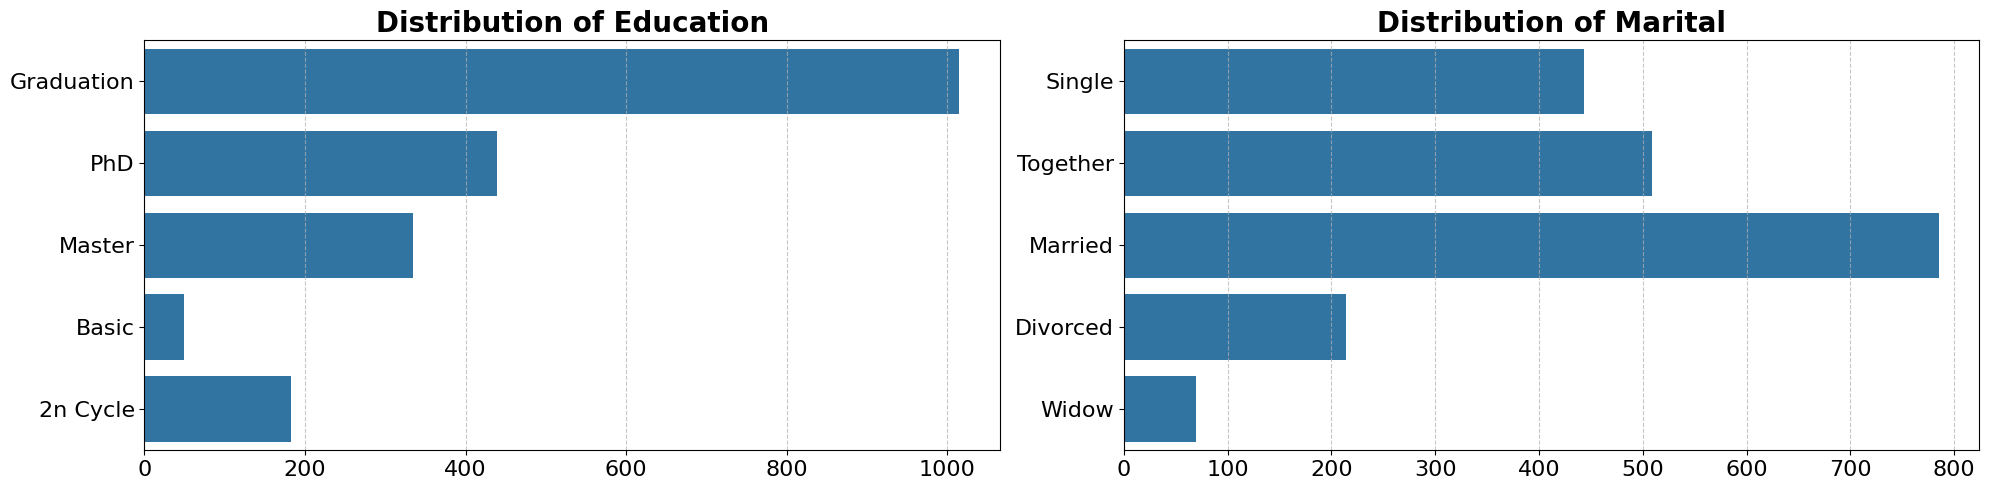

In [21]:
# Lọc các cột kiểu object nhưng không khớp với pattern
object_cols = [col for col in pre_data.select_dtypes(include=['string']).columns]

# Xác định số hàng và số cột cho grid plot
n_cols = 2  # Số cột cố định
n_rows = 1  # Tính số hàng, làm tròn lên

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Điều chỉnh chiều cao theo số hàng
axs = axs.flatten()  # Chuyển thành danh sách 1D để dễ truy cập

for i, col in enumerate(object_cols):
    sns.countplot(data=pre_data, y=col, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}", fontsize=20, fontweight="bold")  # Tăng size chữ tiêu đề
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', labelsize=16)  # Tăng size chữ các giá trị trên trục
    axs[i].grid(True, axis='x', linestyle="--", alpha=0.7)  # Thêm đường lưới dọc

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)  # Điều chỉnh khoảng cách giữa các hàng
plt.show()

**Nhận xét:**
- Trình độ học vấn - `Education`: nhóm "Graduation" chiếm tỷ lệ lớn nhất, trong khi các nhóm "PhD", "Master", "Basic" và "2n Cycle" có quy mô nhỏ hơn nhiều. Điều này phản ánh thực tế xã hội khi số người tốt nghiệp đại học/cao đẳng phổ biến hơn hẳn so với các trình độ khác.  
- Tình trạng hôn nhân - `Marital`: nhóm "Married" chiếm đa số, tiếp đến là "Together" và "Single", trong khi các nhóm "Divorced" và "Widow" ít gặp hơn. Đây cũng là xu hướng hợp lý trong phân bố tình trạng hôn nhân thực tế.  
- Như vậy, sự lệch phân bố này là **đặc điểm tự nhiên của dữ liệu**, không phải outlier hay sai lệch cần xử lý. Khi phân tích hoặc xây dựng mô hình, cần lưu ý rằng các nhóm nhỏ có thể ít đại diện hơn.

##### Hệ số tương quan Point-Biserial

**Định nghĩa:**  
Hệ số tương quan Point-Biserial ($r_{pb}$) là một trường hợp đặc biệt của hệ số tương quan Pearson, dùng để đo lường mối quan hệ tuyến tính giữa **một biến nhị phân** (chỉ có 2 giá trị, ví dụ: 0/1, Nam/Nữ, Có/Không) và **một biến liên tục** (ví dụ: thu nhập, tuổi, điểm số).

---

**Công thức:**  

$$
r_{pb} = \frac{\bar{X}_1 - \bar{X}_0}{s} \cdot \sqrt{\frac{n_1 n_0}{n^2}}
$$

Trong đó:  
- $\bar{X}_1$: giá trị trung bình của biến liên tục ở nhóm có nhãn $1$  
- $\bar{X}_0$: giá trị trung bình của biến liên tục ở nhóm có nhãn $0$  
- $s$: độ lệch chuẩn chung của biến liên tục  
- $n_1$: số lượng quan sát trong nhóm $1$  
- $n_0$: số lượng quan sát trong nhóm $0$  
- $n = n_1 + n_0$: tổng số quan sát  

---

**Ý nghĩa:**  
- $r_{pb}$ nằm trong khoảng $[-1, 1]$.  
- $r_{pb} > 0$: nhóm $1$ có giá trị trung bình cao hơn nhóm $0$.  
- $r_{pb} < 0$: nhóm $1$ có giá trị trung bình thấp hơn nhóm $0$.  
- $|r_{pb}|$ càng lớn thì mối liên hệ giữa hai biến càng mạnh.  

---

**Ứng dụng:**  
- Đánh giá mối quan hệ giữa biến nhị phân (ví dụ: giới tính, tình trạng hôn nhân) với một biến liên tục (ví dụ: thu nhập, chi tiêu).  
- Hữu ích trong phân tích dữ liệu xã hội học, marketing, và khoa học hành vi.  


In [22]:
for col in ["marital_Divorced", "marital_Married", "marital_Single", "marital_Together", "marital_Widow"]:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}') 

0.0037: Point-Biserial Correlation for marital_Divorced with p-value 0.8612
-0.0223: Point-Biserial Correlation for marital_Married with p-value 0.2963
0.0059: Point-Biserial Correlation for marital_Single with p-value 0.7804
0.0016: Point-Biserial Correlation for marital_Together with p-value 0.9393
0.0359: Point-Biserial Correlation for marital_Widow with p-value 0.0921


In [23]:
for col in ["education_2n Cycle", "education_Basic", "education_Graduation", "education_Master", "education_PhD"]:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')   

-0.0603: Point-Biserial Correlation for education_2n Cycle with p-value 0.0046
-0.1386: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0143: Point-Biserial Correlation for education_Graduation with p-value 0.5012
0.0064: Point-Biserial Correlation for education_Master with p-value 0.7653
0.0708: Point-Biserial Correlation for education_PhD with p-value 0.0009


## 3. Khám phá dữ liệu - EDA

### 3.1. Phân nhóm khách hàng bằng Machine Learning

Thử thực hiện dùng **Machine Learning** để phân nhóm khách hàng dựa trên những đặc điểm nổi bật:

- `Kidhome`: Có mối tương quan âm mạnh với tổng chi tiêu (`MntTotal`), cho thấy số con nhỏ trong gia đình có thể làm giảm khả năng chi tiêu.  
- `Income`: Có mối tương quan dương rõ rệt với chi tiêu, phản ánh thu nhập cao thường đi kèm mức mua sắm lớn hơn.  
- `MntTotal`: Tổng chi tiêu trực tiếp của khách hàng, là chỉ báo quan trọng nhất để đánh giá giá trị và tiềm năng trong chiến lược marketing.

Việc xử lý và tái cấu trúc dữ liệu theo hướng này giúp mô hình phân cụm K-means/DBSCAN trở nên đơn giản hơn, đồng thời vẫn giữ được ý nghĩa hành vi của từng nhóm khách hàng.

#### Chuẩn hóa dữ liệu (Normalization)

Chuẩn hóa dữ liệu là quá trình biến đổi các biến số về cùng một thang đo để tránh việc các biến có giá trị lớn áp đảo các biến có giá trị nhỏ hơn trong các mô hình học máy.

---

##### 1. Chuẩn hóa Min-Max

**Công thức:**

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

**Đặc điểm:**
- Tất cả giá trị được đưa về khoảng $[0,1]$.  
- Dễ hiểu, dễ tính toán.  
- Nhược điểm: nhạy cảm với **outlier**, nếu có giá trị quá lớn/nhỏ sẽ làm dữ liệu còn lại bị dồn vào khoảng hẹp.

---

##### 2. Chuẩn hóa Z-Score (Standardization)

**Công thức:**

$$
z = \frac{x - \mu}{\sigma}
$$

**Đặc điểm:**
- Sau chuẩn hóa, biến có trung bình bằng 0 và độ lệch chuẩn bằng 1.  
- Giá trị $z > 0$: lớn hơn trung bình, $z < 0$: nhỏ hơn trung bình.  
- Ít nhạy cảm với **outlier** hơn so với Min-Max.  
- Nhược điểm: giá trị không bị giới hạn trong một khoảng cố định, có thể rất lớn hoặc rất nhỏ.

---

##### 3. So sánh Min-Max và Z-Score

| Tiêu chí | Min-Max | Z-Score |
|----------|---------|---------|
| Công thức | $\dfrac{x - x_{\min}}{x_{\max} - x_{\min}}$ | $\dfrac{x - \mu}{\sigma}$ |
| Khoảng giá trị | $[0,1]$ (hoặc $[-1,1]$ nếu mở rộng) | Trung bình = 0, độ lệch chuẩn = 1 |
| Nhạy với outlier | Rất nhạy | Ít nhạy hơn |
| Khi dùng | Dữ liệu có giới hạn, dùng trong mạng neural | Khi có outlier, phân cụm (clustering), hồi quy tuyến tính |

---

Với bộ dữ liệu này, **z-score normalization** được chọn vì:
- Giảm ảnh hưởng của các biến có thang đo lớn khác biệt.  
- Ít bị méo bởi outlier so với Min-Max.  

In [24]:
# Chọn các biến số muốn đưa vào clustering
# cols_for_clustering = ['Kidhome', 'Income', 'In_relationship', 'MntTotal'] 
cols_for_clustering = ['Kidhome', 'Income', 'MntTotal'] 
X = pre_data[cols_for_clustering].copy()

# Scale dữ liệu (chuẩn hóa về mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA để giảm chiều dữ liệu (giữ lại 2 thành phần để dễ visualize)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

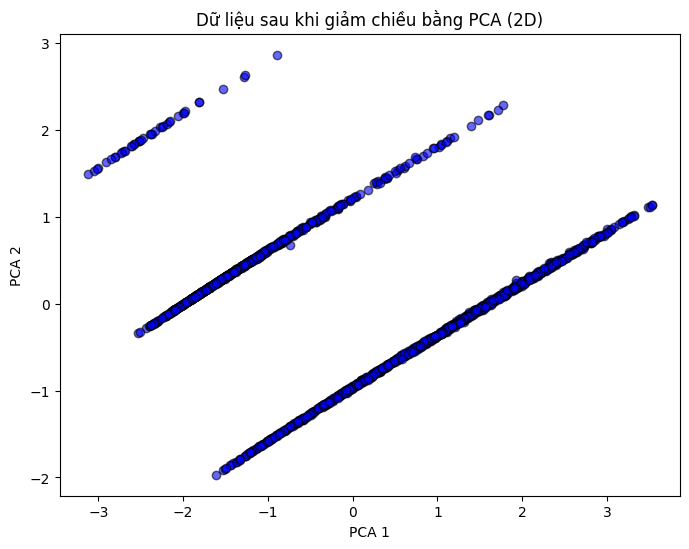

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Dữ liệu sau khi giảm chiều bằng PCA (2D)")
plt.show()

Cách phân bố dữ liệu cho thấy 3 nhóm riêng biệt rõ ràng, đồng thời không phù hợp với thuật toán **KMeans**. Đối với trường hợp này nên sử dụng **DBSCAN** để thay thế.

#### Chọn số lượng cụm tối ưu cho thuật toán

Khi dùng K-means clustering, cần xác định sẵn số cụm **K**. Có nhiều phương pháp để chọn **K** sao cho cụm được phân chia “hợp lý”. Hai độ đo phổ biến là **Elbow Method** và **Silhouette Score**.

**Lưu ý:** phàn này chủ yếu chỉ là nghiên cứu, **không phù hợp** để áp dụng cho thuật toán **DBSCAN**.

---

##### 1. Elbow Method

**Định nghĩa:**

- Elbow Method là một phương pháp đồ họa dùng để tìm **K tối ưu** bằng cách tính toán tổng bình phương khoảng cách trong cụm (Within-Cluster Sum of Squares, WCSS) cho các giá trị K khác nhau.  
- Trục hoành: số cụm K, trục tung: giá trị WCSS.  
- Điểm “elbow” là vị trí mà khi tăng K thì WCSS giảm không đáng kể nữa, tạo thành hình dáng giống khuỷu tay.

**Công thức WCSS:**

$$
\mathrm{WCSS}(K) = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

Trong đó:  
- $x_i$: điểm dữ liệu trong cụm $C_k$  
- $\mu_k$: centroid (trung tâm) của cụm $C_k$  
- $\|\cdot\|$: khoảng cách (thường là Euclidean)  

**Đặc điểm:**
- Ưu điểm: đơn giản, trực quan, dễ áp dụng.  
- Nhược điểm: đôi khi **không có điểm elbow rõ ràng**, đường cong giảm từ từ khó chọn K.

---

##### 2. Silhouette Score

**Định nghĩa:**

- Silhouette Score đo lường chất lượng cụm bằng cách kết hợp **khoảng cách nội cụm** (intra-cluster) và **khoảng cách giữa cụm** (inter-cluster).  
- Với mỗi điểm $x$:  
  - $a(x)$: khoảng cách trung bình từ $x$ tới các điểm khác trong cùng cụm.  
  - $b(x)$: khoảng cách trung bình từ $x$ tới các điểm trong cụm gần nhất khác.  
- Điểm silhouette của $x$:

$$
s(x) = \frac{b(x) - a(x)}{\max \{a(x), b(x)\}}
$$

Silhouette Score tổng thể = giá trị trung bình của tất cả $s(x)$.

**Khoảng giá trị:**
- $s(x) \approx 1$: điểm nằm trong cụm tốt, phân tách rõ.  
- $s(x) \approx 0$: cụm có sự chồng lấn, không rõ ràng.  
- $s(x) \approx -1$: điểm có thể bị gán sai cụm.  

**Đặc điểm:**
- Ưu điểm: đánh giá được cả sự gắn kết trong cụm và sự phân tách giữa các cụm.  
- Nhược điểm: tính toán phức tạp hơn, tốn chi phí với dữ liệu lớn.

---

##### 3. So sánh nhanh

| Tiêu chí | Elbow Method | Silhouette Score |
|----------|--------------|------------------|
| Loại độ đo | WCSS (nội cụm) | Cân bằng intra + inter cluster |
| Kết quả | Chọn K tại điểm “elbow” | Chọn K có silhouette score trung bình cao nhất |
| Ưu điểm | Dễ hiểu, dễ tính | Đánh giá cụm toàn diện hơn |
| Hạn chế | Không phải lúc nào cũng có elbow rõ ràng | Tính toán nặng hơn |

---

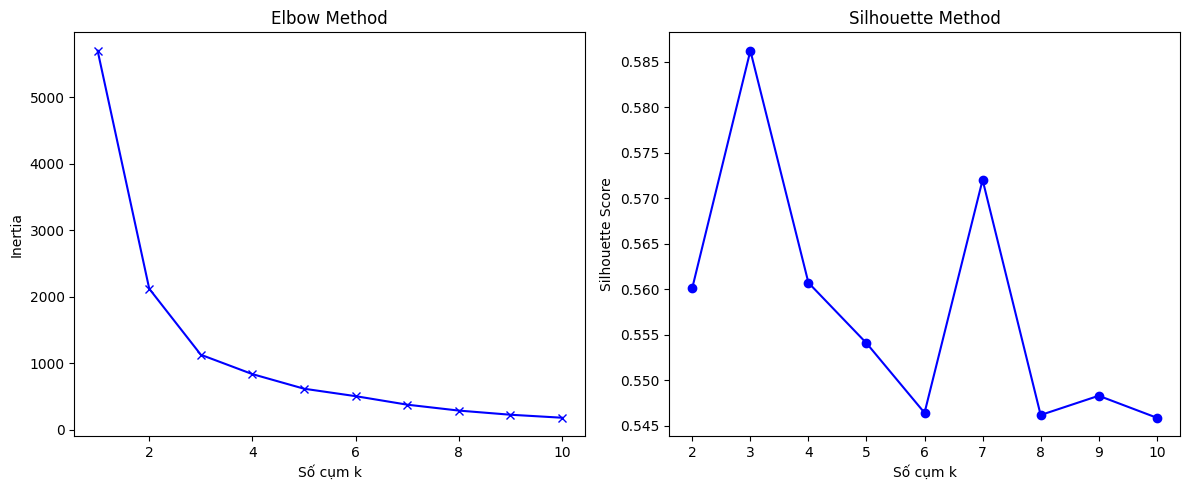

In [26]:
inertia, silhouette_scores = [], []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(score)

# 3. Vẽ 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axes[0].plot(K, inertia, 'bx-')
axes[0].set_xlabel('Số cụm k')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

# Silhouette
axes[1].plot(range(2, 11), silhouette_scores, 'bo-')
axes[1].set_xlabel('Số cụm k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Method')

plt.tight_layout()
plt.show()


**Elbow Method**  
- Quan sát biểu đồ Elbow, giá trị $SSE$ (Sum of Squared Errors) giảm mạnh khi số cụm tăng từ $k = 1$ đến $k = 3$.  
- Sau mốc $k = 3$, đường cong bắt đầu dần phẳng hơn, nghĩa là việc tăng thêm số cụm không giúp cải thiện đáng kể độ chặt của các cụm.  
- Do đó, điểm gấp khúc ("elbow") hợp lý nằm tại **$k = 3$**.

**Silhouette Method**  
- Trên biểu đồ Silhouette, chỉ số $Silhouette$ đạt giá trị cao nhất ở $k = 3$ (xấp xỉ $0.59$).  
- Khi tăng số cụm lớn hơn $3$, chỉ số này có xu hướng giảm dần, cho thấy chất lượng phân cụm kém hơn.  
- Điều này khẳng định rằng **$k = 3$** là số cụm tối ưu.

**Kết luận**  
- Cả hai phương pháp Elbow và Silhouette đều thống nhất rằng số cụm tối ưu cho bộ dữ liệu là **$3$ cụm**.  
- Elbow Method giúp xác định điểm cân bằng giữa độ chặt cụm và số lượng cụm.  
- Silhouette Method chứng minh rằng mức độ tách biệt và đồng nhất giữa các cụm là tốt nhất tại $k = 3$.  

Vì vậy, số cụm được lựa chọn cuối cùng là **$k = 3$**.


#### Sử dụng thuật toán DBSCAN để gom cụm dữ liệu

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) là một thuật toán phân cụm dựa trên mật độ, cho phép phát hiện các cụm có hình dạng bất kỳ và xác định điểm nhiễu (**outlier**) trong dữ liệu.  

---

**Quy trình hoạt động:**  

1. Chọn tham số $\varepsilon$ (eps) và $MinPts$ (số lượng điểm lân cận tối thiểu).  
2. Với mỗi điểm dữ liệu $x_i$:  
   - Nếu trong bán kính $\varepsilon$ của $x_i$ có ít nhất $MinPts$ điểm, thì $x_i$ được coi là **core point** (điểm lõi).  
   - Các điểm trong vùng lân cận của core point sẽ được gán vào cùng một cụm.  
   - Quá trình này được lặp lại để mở rộng cụm.  
3. Điểm không thuộc cụm nào sẽ được đánh dấu là **noise** (nhiễu).  

---

**Khái niệm quan trọng:**  

- **Core point**: điểm có ít nhất $MinPts$ lân cận trong bán kính $\varepsilon$.  
- **Border point**: điểm nằm trong vùng lân cận của core point nhưng không đủ $MinPts$ để tự trở thành core point.  
- **Noise point**: điểm không thuộc cụm nào.  

---

**Ưu điểm:**  
- Không cần xác định trước số cụm.  
- Có thể phát hiện cụm với hình dạng bất kỳ.  
- Xử lý tốt nhiễu và outlier.  

**Nhược điểm:**  
- Kết quả phụ thuộc mạnh vào việc lựa chọn tham số $\varepsilon$ và $MinPts$.  
- Khó hoạt động tốt trên dữ liệu có mật độ không đồng đều.  


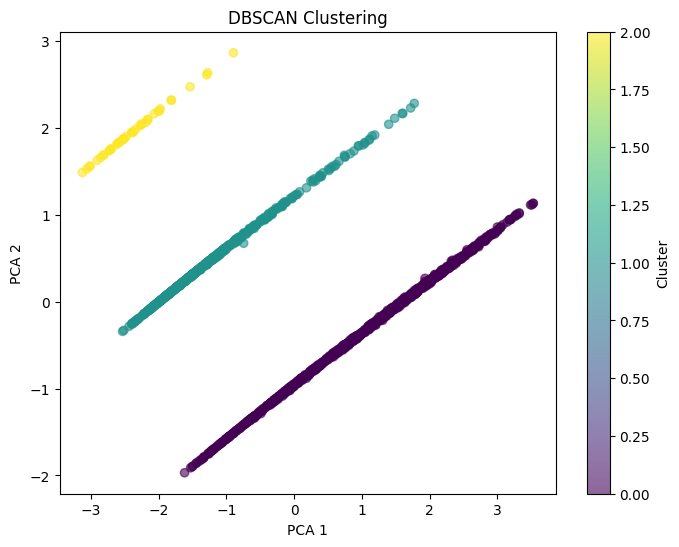

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Chạy DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps và min_samples bạn có thể điều chỉnh
clusters_dbscan = dbscan.fit_predict(X_pca)

# Vẽ kết quả phân cụm
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_dbscan, cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

#### Phân tích đặc trưng của từng cụm

Để hiểu rõ hơn về bản chất của từng cụm, ta lấy trung bình các biến trong mỗi cụm nhằm xác định đặc trưng đại diện cho cụm đó.

In [28]:
# Gắn vào dữ liệu gốc
pre_data['Cluster'] = clusters_dbscan
pre_data.groupby('Cluster')[cols_for_clustering].mean()

,Kidhome,Income,MntTotal
Cluster,,,
0,0.0,61634.715266,845.938250
1,1.0,38093.395577,182.619165
2,2.0,38679.219512,107.365854


In [36]:
groupby_cluster = pre_data.groupby('Cluster')[numeric_cols].mean().reset_index()
groupby_cluster.head()

,Cluster,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0,61634.715266,0.0,0.537736,48.415094,456.691252,39.500000,252.336192,56.407376,41.003431,59.914237,1.945969,5.036878,3.925386,7.249571,4.382504,53.842196,2520.194683,845.938250,786.024014,0.433962
1,1,38093.395577,1.0,0.465602,49.439803,103.722359,8.542998,49.396806,12.203931,8.753071,22.359951,2.879607,2.874693,0.912776,3.871007,6.652334,47.185504,2502.898034,182.619165,160.259214,0.126536
2,2,38679.219512,2.0,0.585366,51.024390,60.707317,6.634146,28.634146,7.121951,4.268293,17.195122,2.341463,2.536585,0.609756,3.243902,6.536585,51.682927,2440.585366,107.365854,90.170732,0.048780


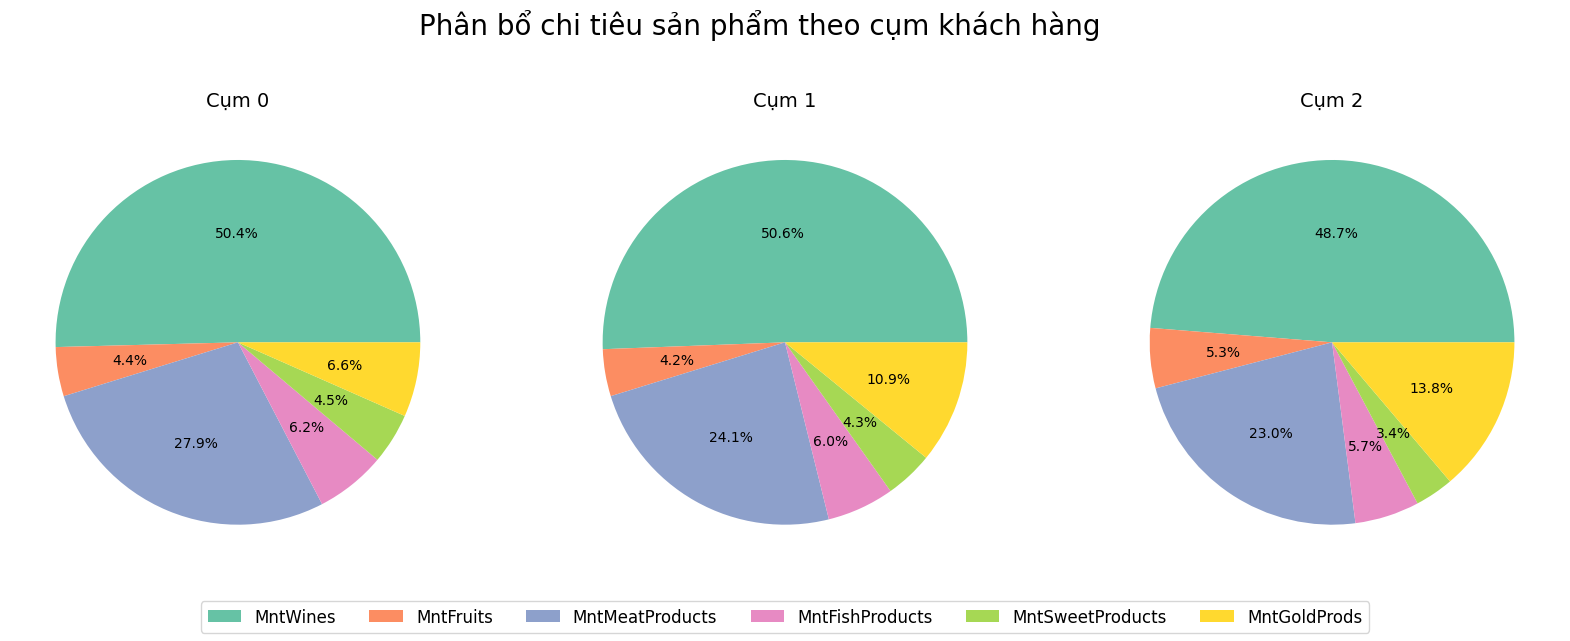

In [63]:
# Các cột sản phẩm cần vẽ
cols = ["MntWines", "MntFruits", "MntMeatProducts", 
        "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Tạo bảng màu cố định
colors = cm.Set2.colors[:len(cols)]

# Vẽ 3 biểu đồ tròn cho 3 cluster
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, ax in enumerate(axes.flatten()):
    groupby_cluster.iloc[i][cols].plot.pie(
        colors=colors,
        autopct="%.1f%%",
        labels=None,   # bỏ nhãn trên pie
        ax=ax,
        ylabel="",  
        legend=False
    )
    ax.set_title(f"Cụm {groupby_cluster.index[i]}", fontsize=14)

# Legend chung ở dưới
fig.legend(cols, loc="lower center", ncol=len(cols), fontsize=12)
fig.suptitle("Phân bổ chi tiêu sản phẩm theo cụm khách hàng", fontsize=20, y=1.05)
plt.show()

**Nhận xét chung:**
- **Rượu vang** luôn chiếm tỷ trọng chi tiêu lớn nhất trong tất cả các cụm.  
- Khi **số trẻ con trong gia đình tăng**, khách hàng có xu hướng:  
  - **Tăng chi tiêu cho trái cây và vàng**.  
  - **Giảm tỉ trọng chi tiêu cho thịt và đồ ngọt**.  

Điều này phản ánh sự thay đổi trong hành vi tiêu dùng: các gia đình nhiều trẻ con ưu tiên nhóm sản phẩm thiết yếu và tích lũy giá trị (trái cây, vàng), thay vì tập trung vào các mặt hàng mang tính hưởng thụ (thịt, đồ ngọt).


## Các nội dung dự tính phân tích

### 3.1. Tổng quan chi tiêu và hành vi

#### Phân tích phân bố chi tiêu tổng (`MntTotal`)

**Mục tiêu:** Đánh giá hành vi chi tiêu của khách hàng thông qua biến tổng chi tiêu (`MntTotal`), nhằm xác định cấu trúc phân bổ và sự khác biệt giữa các nhóm khách hàng.  

**Kết quả kỳ vọng:**  
- Phát hiện sự tồn tại của các **outlier** – **nhóm khách hàng có mức chi tiêu vượt trội** so với phần còn lại.  
- Đo lường mức độ **tập trung doanh thu**, chẳng hạn hiện tượng **Pareto 80/20** (20% khách hàng tạo ra 80% doanh thu).  
- Phân tách khách hàng theo mức chi tiêu thấp / trung bình / cao để phục vụ các chiến lược marketing và chính sách ưu đãi khác nhau.  

**Ý nghĩa phân tích:**  
Đây là bước phân tích **đơn biến (univariate analysis)** với biến `MntTotal` làm trọng tâm. Việc hiểu rõ phân bố chi tiêu giúp doanh nghiệp:  
- Nhận diện nhóm khách hàng **VIP** có giá trị dài hạn cao (High Value Customers).  
- Thiết kế các chương trình **giữ chân**, **chăm sóc đặc biệt**, hoặc **khuyến khích chi tiêu thêm** phù hợp với từng phân khúc.  
- Tạo tiền đề cho các phân tích nâng cao hơn, như **phân khúc khách hàng (segmentation)** hoặc **dự đoán giá trị vòng đời khách hàng (CLV prediction)**.  

#### Hành vi mua sắm (`Num*Purchases`)

**Mục tiêu:** Phân tích tần suất và kênh mua hàng của khách hàng nhằm làm rõ mối liên hệ giữa hành vi mua sắm và mức chi tiêu tổng (`MntTotal`).  

**Kết quả kỳ vọng:**  
- Xác định xem nhóm chi tiêu cao có đồng thời là nhóm mua sắm nhiều kênh hay chỉ tập trung vào một kênh chính (`Catalog`, `Store`, `Web`).  
- Phát hiện sự khác biệt về mức độ tương quan: các biến `NumCatalogPurchases`, `NumStorePurchases`, `NumWebPurchases` có quan hệ chặt chẽ hơn với `MntTotal` so với `NumDealsPurchases`.  
- Đánh giá mức độ hiệu quả của các kênh phân phối trong việc tạo ra doanh thu.  

**Ý nghĩa phân tích:**  
Hiểu hành vi mua sắm giúp doanh nghiệp tối ưu hóa chiến lược marketing đa kênh. Nếu khách hàng chi tiêu cao thường mua ở kênh cụ thể, doanh nghiệp có thể tập trung đầu tư vào kênh đó để tăng hiệu quả. Ngược lại, nếu khách hàng đa kênh là nhóm mang lại doanh thu lớn, cần xây dựng trải nghiệm mua hàng xuyên suốt (omnichannel) để giữ chân họ. Kết quả phân tích cũng góp phần định hướng chiến lược **phân khúc khách hàng theo kênh mua sắm** và hỗ trợ các mô hình dự đoán doanh thu.  


#### Hành vi truy cập online (`NumWebVisitsMonth`)

**Mục tiêu:** Phân tích mối quan hệ giữa số lần khách hàng truy cập website và mức chi tiêu (`MntTotal`), nhằm đánh giá vai trò của kênh online trong chuyển đổi doanh thu.  

**Kết quả kỳ vọng:**  
- Xác định rằng nhiều khách hàng có số lượt truy cập cao nhưng không đi kèm với mức chi tiêu lớn.  
- Làm rõ sự tồn tại của **tương quan âm** giữa `NumWebVisitsMonth` và `MntTotal`, cho thấy truy cập nhiều không đồng nghĩa với chi tiêu cao.  
- Đề xuất kiểm tra **conversion rate** theo số lượt truy cập để phát hiện ngưỡng tối ưu (ví dụ: khách truy cập quá nhiều nhưng không mua → dấu hiệu quan tâm nhưng chưa thỏa mãn nhu cầu).  

**Ý nghĩa phân tích:**  
Kết quả giúp doanh nghiệp hiểu rõ hơn về hiệu quả kênh online. Nếu số lượt truy cập cao mà không dẫn đến mua hàng, có thể tồn tại vấn đề về **trải nghiệm người dùng**, **giá cả**, hoặc **chiến lược tiếp thị trực tuyến**. Phân tích sâu hơn sẽ hỗ trợ cải thiện tỷ lệ chuyển đổi (conversion rate optimization) và tối ưu ngân sách marketing online. Ngoài ra, phát hiện nhóm khách hàng “hay xem nhưng ít mua” cũng giúp xác định phân khúc tiềm năng cho các chiến dịch remarketing hoặc cá nhân hóa ưu đãi.  


#### Mối liên hệ giữa hành vi và chi tiêu

**Mục tiêu:** Đánh giá mối quan hệ giữa nhóm khách hàng có mức chi tiêu cao (`MntTotal`) và các yếu tố hành vi chính, bao gồm: tần suất mua hàng (`Num*Purchases`), tận dụng khuyến mãi (`NumDealsPurchases`), và truy cập web thường xuyên (`NumWebVisitsMonth`).  

**Kết quả kỳ vọng:**  
- Làm rõ liệu nhóm chi tiêu cao có đồng thời là nhóm có **tần suất mua nhiều** hay không.  
- Xác định mức độ đóng góp của **khuyến mãi** so với các kênh mua khác, từ đó phân biệt khách hàng chi tiêu bền vững với khách hàng phụ thuộc ưu đãi.  
- Kiểm tra xem **truy cập web thường xuyên** có thực sự đi kèm với chi tiêu hay chủ yếu chỉ phản ánh hành vi tìm kiếm thông tin.  

**Ý nghĩa phân tích:**  
Phân tích mối liên hệ giữa hành vi và chi tiêu giúp nhận diện **yếu tố hành vi tác động mạnh nhất đến doanh thu**. Điều này hỗ trợ doanh nghiệp thiết kế chiến lược marketing chính xác hơn, ví dụ: ưu tiên thúc đẩy kênh mua hiệu quả, tối ưu hóa chính sách khuyến mãi, hoặc cải thiện trải nghiệm online để tăng tỷ lệ chuyển đổi. Đồng thời, kết quả cũng có thể làm cơ sở xây dựng **mô hình dự đoán giá trị khách hàng (CLV)** dựa trên hành vi.  


### 3.2. Ảnh hưởng của con cái đến hành vi tiêu dùng
- Nhóm có con (`Kidhome`, `Teenhome`) khác gì so với nhóm không con về tổng chi tiêu và loại sản phẩm ưu tiên?  
- Vì sao `Kidhome` và `NumWebVisitsMonth` lại có tương quan âm với `MntTotal`? Có phải họ chỉ vào web nhiều nhưng ít mua hàng?  

### 3.3. Đánh giá kênh bán hàng và khuyến mãi
- Kênh nào tạo ra doanh thu nhiều nhất: Web, Catalog hay Store?  
- `NumDealsPurchases` có thực sự dẫn đến tăng `MntTotal`, hay chỉ làm khách hàng “săn deal” mà chi tiêu không cao?  
- Khách hàng gắn bó lâu năm (`Customer_Days`) có xu hướng phản hồi tốt hơn với khuyến mãi không?

### 3.4. Phân khúc khách hàng tiềm năng
- Nếu chia khách hàng thành nhóm chi tiêu **cao – trung bình – thấp**, nhóm nào đóng góp lớn nhất vào tổng doanh thu?  
- Có nhóm **outlier chi tiêu cực cao** không, và họ khác biệt như thế nào so với phần đông?

### 3.5. Kết hợp nhân khẩu học và hành vi
- Thu nhập (`Income`) có mối quan hệ rõ ràng với chi tiêu (`MntTotal`) không?  
- Có sự khác biệt trong hành vi chi tiêu giữa nhóm học vấn (`Education`) hoặc tình trạng hôn nhân (`Marital`) không? 

### Phần nội dung cho dashboard tổng quan 